## FACE DETECTION

In [ ]:
'''
-> Here we use HAAR CASCADES, which is a key component of the VIOLA-JONES object detection framework
-> This is FACE DETECTION (detect a face in an image) and NOT FACE RECOGINITION (don't know who's face it is)
-> For facial recognition, we need a really large dataset and use deep learning 
-> In 2001, Paul Viola and Michael Jones published their method of face detection based on the simple concept of a few key
features
-> They also came up with the idea of pre-computing an integral image to save time on calculations
-> Main feature types:
    --> Edge Features (white against black)
    --> Line Features (dark with white on both sides)
    --> Four-rectangle Features 
-> Each feature is a single value obtained by subtracting sum of pixels under white rectangle from sum of pixels under black rectangle
    i.e. mean(dark region) - mean(white region)
-> Realistically, our images won't be perfect edges or lines
-> A perfect edge would result in a value of one; closer the result to 1, the better the feature
'''

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image 

def display(image, h=10, w=8, cmap='gray'):
    figure = plt.figure(figsize=(h,w))
    ax = figure.add_subplot(111)
    ax.imshow(image, cmap='gray')

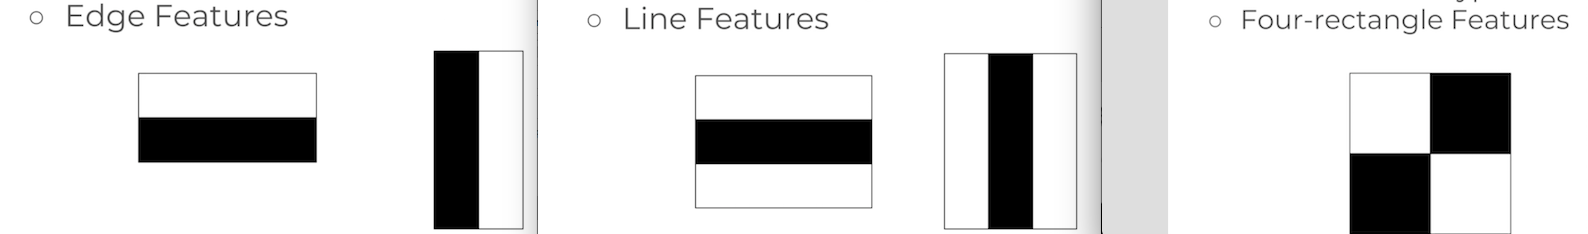

In [10]:
Image(filename='../images/UDEMY_computer_vision_Joseph_Portilla/computer_vision6_object_detection12.png', height=600, width=800)

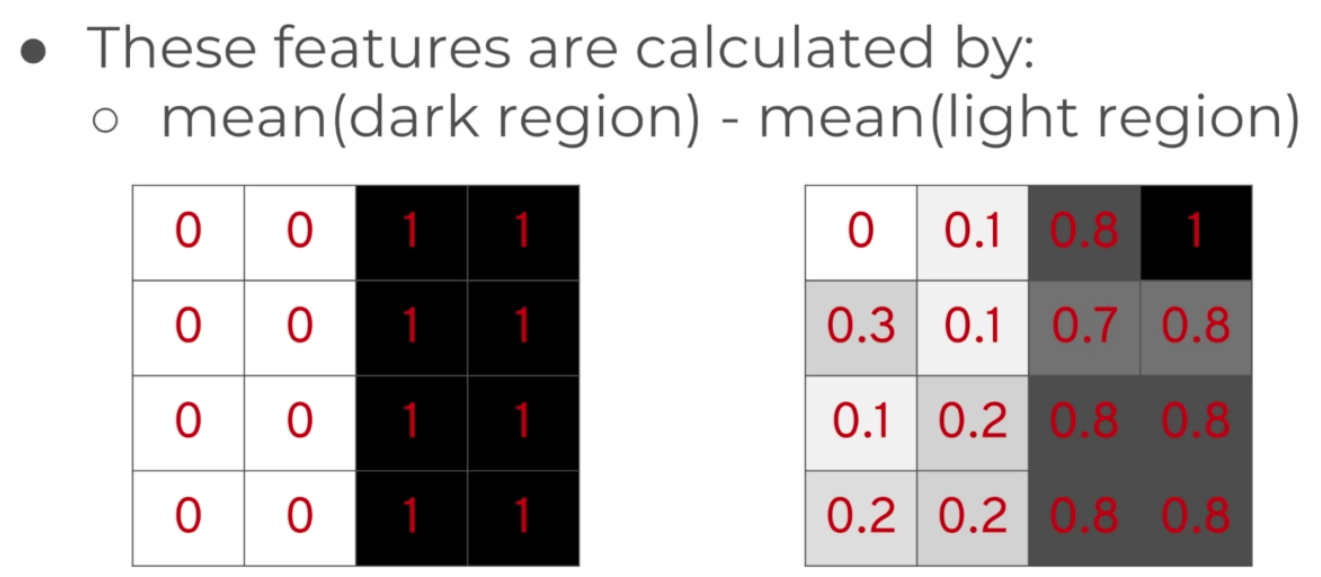

In [13]:
Image(filename='../images/UDEMY_computer_vision_Joseph_Portilla/computer_vision6_object_detection13.png', height=400, width=600)

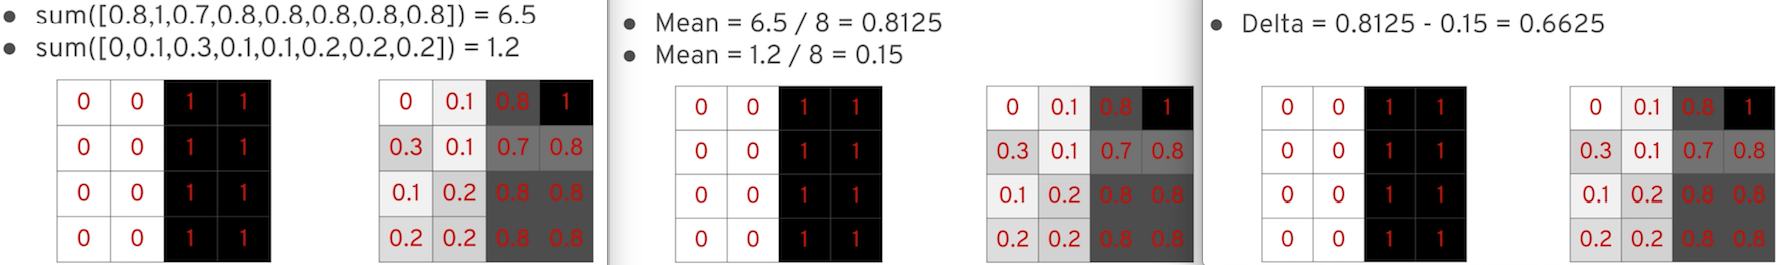

In [14]:
Image(filename='../images/UDEMY_computer_vision_Joseph_Portilla/computer_vision6_object_detection14.png', height=700, width=900)

In [ ]:
'''
-> We can decide on a theshold value to decide on whether a feature passed or not (Ex: if > 0.5, there is an edge)
-> Calulating these sums for the entire image would be very computationally expense
-> The Viola-Jones algorithm solves this by using the integral image, resulting in an O(1) running time of
   the algorithm (precaluclate the interval image(aka)summed area table; sum of any sub-rectangle is the bottom-right corner value of that sub-rectangle)
-> The algorithm also saves time by going through a cascade of classifiers; this means we will treat the image to a series(a cascade) of classifiers
   based on the simple features shown earlier
-> Once the image fails a classifier, we can stop attempting to detect a face
-> A common misconcepton behind face detection with this algorithm is that the algorithm slowly 'scans' the entore image looking for a face; this would be 
   very inefficient, instead we pass the cascade of classifiers
'''

### Feature types Viola & Jones proposed:

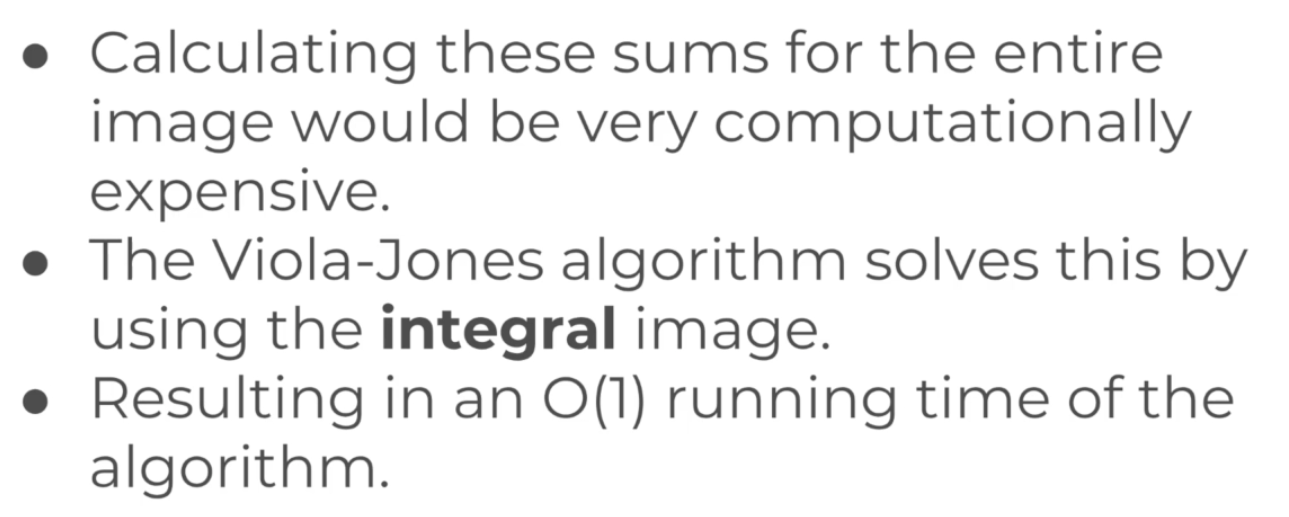

In [107]:
Image(filename='../images/UDEMY_computer_vision_Joseph_Portilla/computer_vision6_object_detection15.png', height=500, width=700)

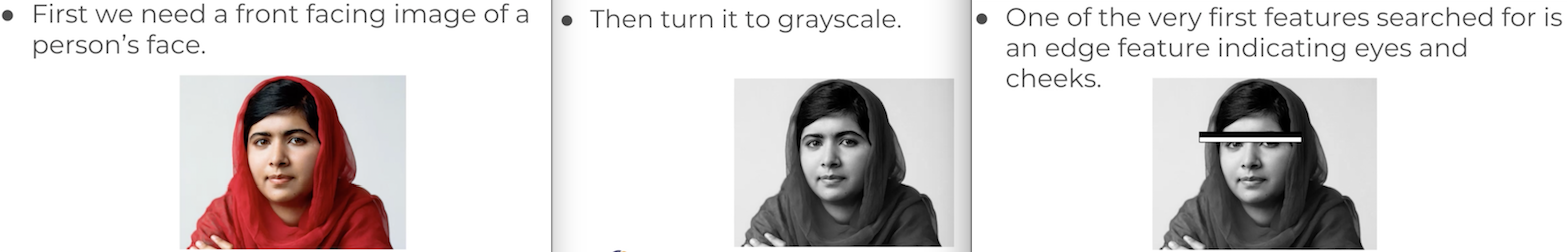

In [112]:
Image(filename='../images/UDEMY_computer_vision_Joseph_Portilla/computer_vision6_object_detection16.png', height=800, width=1000)

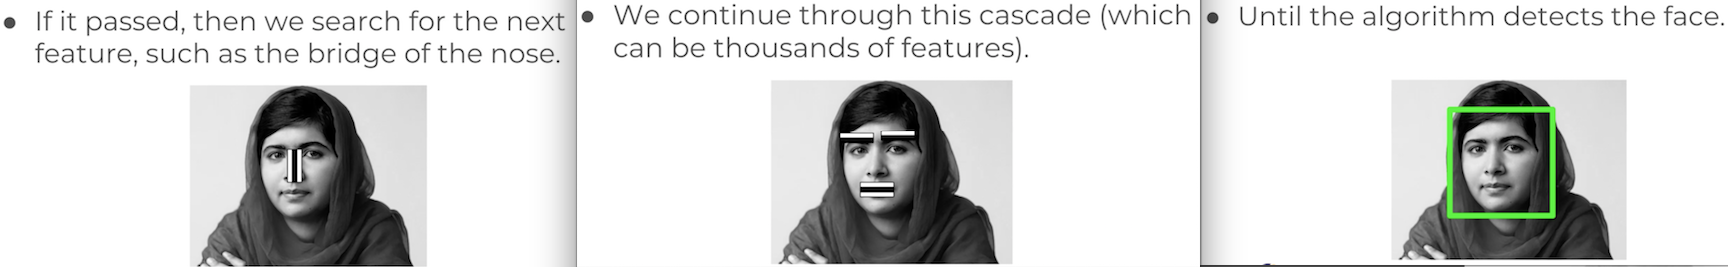

In [113]:
Image(filename='../images/UDEMY_computer_vision_Joseph_Portilla/computer_vision6_object_detection17.png', height=800, width=1000)

In [ ]:
'''
-> Steps:
1) First we need a front facing image of a person's face
2) Turn it into a gray scale image
3) Then we begin the search for HAAR Cascade features
4) One of the very first features searched for is an edge feature indicating eyes and cheeks
5) If the image were to fail for the search for this feature, we can quickly say there is no face
6) If it passed, then we search for the next feature, such as the bridge of the nose
7) We continue through this cascade (which can be thousands of features)
8) This search for features continues until you pass a majority of them; you can have some threshold as to indicate a feature/classifier pass
9) Until the algorithm detects the face

-> Theoretically this approach can be used for a verity of objects or detections, not just faces(ex: eye detector)
-> Cons: Very large data set is needed to create your own features; but there are many pre-trained sets of geatures we can make use of
-> OpenCV comes with pre-trained xml files of various Haar Cascades (we'll create our own classification alogrithms later using deep learning)
'''

In [8]:
image_nadia = cv2.imread('../../data/raw/Computer-Vision-with-Python_Joseph_Portilla/DATA/Nadia_Murad.jpg',0)
image_dennis = cv2.imread('../../data/raw/Computer-Vision-with-Python_Joseph_Portilla/DATA/Denis_Mukwege.jpg',0)
image_solvay = cv2.imread('../../data/raw/Computer-Vision-with-Python_Joseph_Portilla/DATA/solvay_conference.jpg',0)
image_cyril1 = cv2.imread('../../data/raw/Computer-Vision-with-Python_Joseph_Portilla/DATA/cyril1.png',0)
image_cyril2 = cv2.imread('../../data/raw/Computer-Vision-with-Python_Joseph_Portilla/DATA/cyril2.png',0)
image_cyril3 = cv2.imread('../../data/raw/Computer-Vision-with-Python_Joseph_Portilla/DATA/cyril3.png',0) 

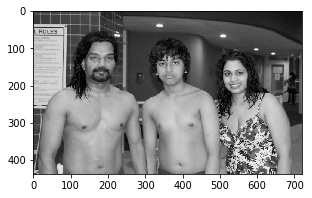

In [97]:
display(image_cyril1,5,3)

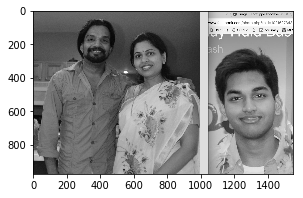

In [71]:
display(image_cyril2,5,3)

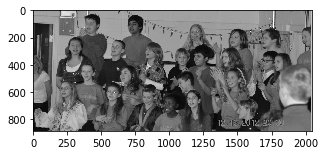

In [72]:
display(image_cyril3,5,3)

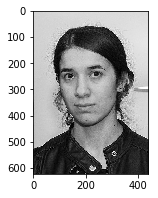

In [74]:
display(image_nadia,5,3)

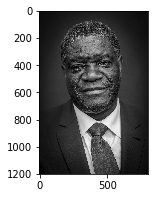

In [75]:
display(image_dennis,5,3)

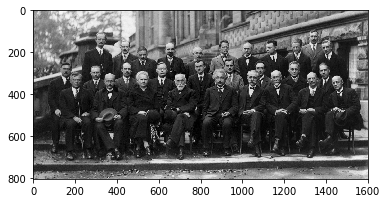

In [17]:
display(image_solvay, 6,4)

#### Read cascade xml

In [78]:
face_cascade = cv2.CascadeClassifier('../../data/raw/Computer-Vision-with-Python_Joseph_Portilla/DATA/haarcascades/haarcascade_frontalface_default.xml')

In [ ]:
'''Docstring:
detectMultiScale(image[, scaleFactor[, minNeighbors[, flags[, minSize[, maxSize]]]]]) -> objects
.   @brief Detects objects of different sizes in the input image. The detected objects are returned as a list of rectangles.
.   
.   @param image Matrix of the type CV_8U containing an image where objects are detected.
.   @param objects Vector of rectangles where each rectangle contains the detected object, therectangles may be partially outside the original image.
.   @param scaleFactor Parameter specifying how much the image size is reduced at each image scale.
.   @param minNeighbors Parameter specifying how many neighbors each candidate rectangle should have to retain it.
.   @param flags Parameter with the same meaning for an old cascade as in the functioncvHaarDetectObjects. It is not used for a new cascade.
.   @param minSize Minimum possible object size. Objects smaller than that are ignored.
.   @param maxSize Maximum possible object size. Objects larger than that are ignored. If `maxSize == minSize` model is evaluated on single scale.
.   
.   The function is parallelized with the TBB library.
.   
.   @note
.   -   (Python) A face detection example using cascade classifiers can be found at
.   opencv_source_code/samples/python/facedetect.py 
'''

In [23]:
def detect_face(image):
    face_image = image.copy()
    
    face_rectangles = face_cascade.detectMultiScale(face_image)
    
    for (x,y,w,h) in face_rectangles:
        cv2.rectangle(face_image, (x,y),(x+w,y+h), (255,255,255),10)
        
    return face_image

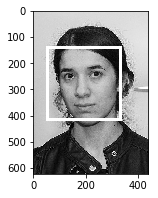

In [63]:
result = detect_face(image_nadia)
display(result, 5,3)

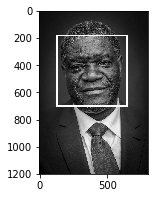

In [64]:
result = detect_face(image_dennis)
display(result, 5,3)

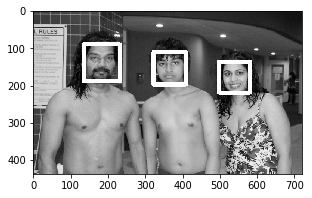

In [65]:
result = detect_face(image_cyril1)
display(result, 5,3)

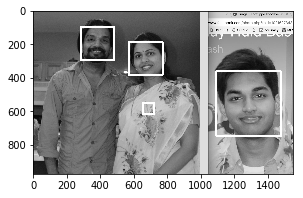

In [66]:
result = detect_face(image_cyril2)
display(result, 5,3)

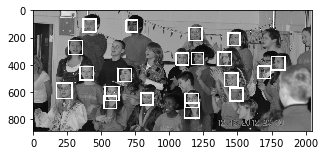

In [67]:
result = detect_face(image_cyril3)
display(result, 5,3)

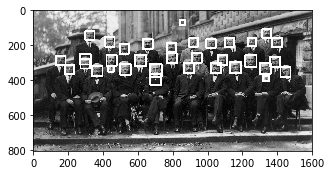

In [68]:
result = detect_face(image_solvay)
display(result, 5,3)

In [38]:
def detect_face2(image, scaleFactor=1.2, minNeighbors=5):
    face_image = image.copy()
    
    face_rectangles = face_cascade.detectMultiScale(face_image, scaleFactor, minNeighbors)
    
    for (x,y,w,h) in face_rectangles:
        cv2.rectangle(face_image, (x,y),(x+w,y+h), (255,255,255),10)
        
    return face_image

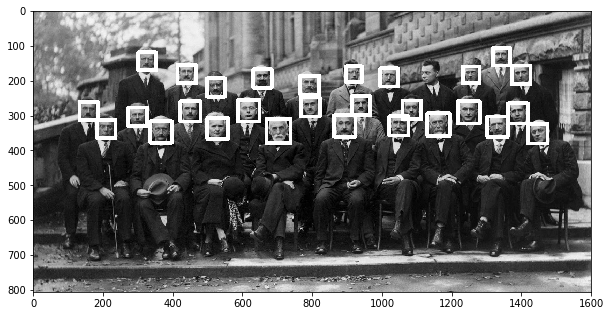

In [39]:
result = detect_face2(image_solvay)
display(result)

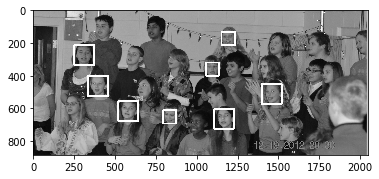

In [48]:
result = detect_face2(image_cyril3, 1.5,10)
display(result,6,4)

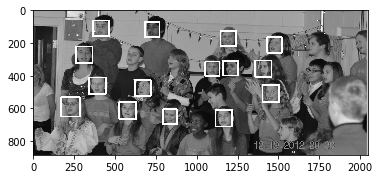

In [49]:
result = detect_face2(image_cyril3) #scaleFactor=1.2, minNeighbors=5
display(result,6,4)

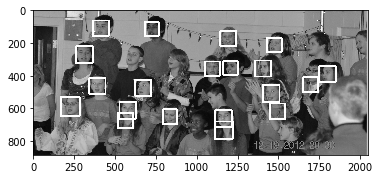

In [51]:
result = detect_face2(image_cyril3, 1.1,3)
display(result,6,4)

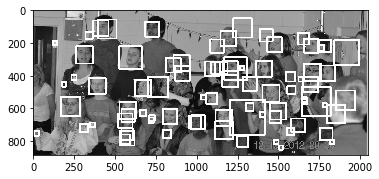

In [60]:
result = detect_face2(image_cyril3, 1.01,3)
display(result,6,4)

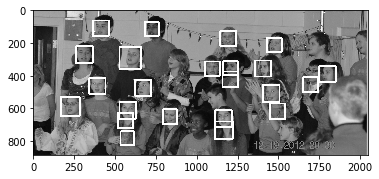

In [62]:
result = detect_face2(image_cyril3, 1.1,2)
display(result,6,4)

In [77]:
eyes_cascade = cv2.CascadeClassifier('../../data/raw/Computer-Vision-with-Python_Joseph_Portilla/DATA/haarcascades/haarcascade_eye.xml')

In [91]:
def detect_eyes(image, scaleFactor=1.2, minNeighbors=2):
    face_image = image.copy()
    
    face_rectangles = eyes_cascade.detectMultiScale(face_image, scaleFactor, minNeighbors)
    
    for (x,y,w,h) in face_rectangles:
        cv2.rectangle(face_image, (x,y),(x+w,y+h), (255,255,255),10)
        
    return face_image

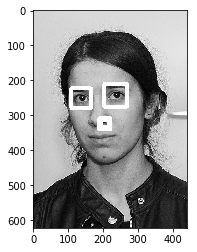

In [92]:
result = detect_eyes(image_nadia, 1.1,2)
display(result,6,4)

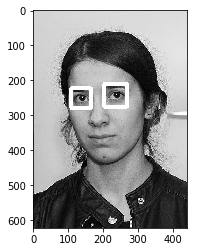

In [93]:
result = detect_eyes(image_nadia, 1.1,3)
display(result,6,4)

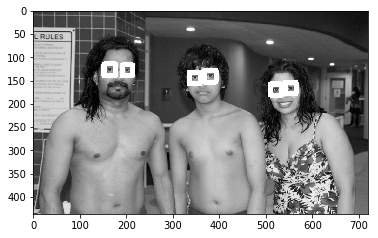

In [99]:
result = detect_eyes(image_cyril1, 1.1,5)
display(result,6,4)

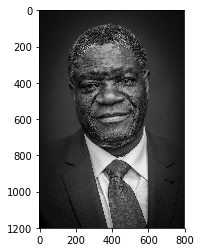

In [105]:
result = detect_eyes(image_dennis, 1.5,1)
display(result,6,4)

### TO DO: fix dennis's eyes later

In [ ]:
#END